In [2]:

from matplotlib import pyplot as plt
import pandas as pd
from utils import save_fig_for_raport
from pandas.plotting import autocorrelation_plot
import pandas.plotting
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

/home/archie/code/Masteroppgave/venv-pycharm2/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
# raw_data = pipeline.market_insight_pipeline().run()
raw_data_small = pd.read_csv(
    "../datasets/interim/market_insight_preprocessed.csv",
    parse_dates=["date"],
)
raw_data_small.head()
raw_data_small.groupby("cat_id").count()

,date,product_id,root_cat_id,hits,clicks,popularity,cat_name
cat_id,,,,,,,
33,29,29,29,29,29,29,29
11037,399,399,399,399,399,399,399
11091,228,228,228,228,228,228,228
11573,902,902,902,902,902,902,902


In [4]:
# id11573 has mose data with 902 entries
# data_chosen_cat = raw_data.loc[raw_data["cat_id"] == 11573][["hits","clicks", "date"]]
data_chosen_cat_small= raw_data_small.loc[raw_data_small["cat_id"] == 11573][["hits", "date"]]
data_chosen_cat_filled_dates_small = data_chosen_cat_small.groupby(pd.Grouper(key="date", freq="D")).sum()

print(data_chosen_cat_filled_dates_small.head())
dates = data_chosen_cat_filled_dates_small.index.tolist()
print(dates[:2])
data_chosen_cat_filled_dates_small.tail()
data = data_chosen_cat_filled_dates_small


            hits
date            
2018-12-02     2
2018-12-03    16
2018-12-04     1
2018-12-05     5
2018-12-06     3
[Timestamp('2018-12-02 00:00:00', freq='D'), Timestamp('2018-12-03 00:00:00', freq='D')]


In [130]:
# Source https://artofmemory.com/blog/how-to-calculate-the-day-of-the-week/
# (Year Code + Month Code + Century Code + Date Number - Leap Year Code)
# Index 0 is january 1st, index 1 is february 1st, etc.
from datetime import datetime
d = 1897
year_code = lambda date: (int(str(date.year)[2:]) + (int(str(date.year)[2:]) // 4) ) % 7
def century_code(date):
  year = str(date.year)[:2]
  code = 4
  if year == "17":
    code = 4
  elif year == "18":
    code =2
  elif year == "19":
    code =  0
  elif year == "20":
    code = 6
  elif year == "21":
    code = 4
  elif year == "22":
      code = 2
  elif year == "23":
    code = 0
  return code

month_codes =[  0,3,3,6,1,4,6,2,5,0,3,5, ]
month_code = lambda date: month_codes[date.month - 1]
date_number = lambda date: date.day

def leap_year_code(date):
  year = date.year
  month = date.month
  code = 0
  is_divisible_by_4_but_not_100 = year % 4 == 0 and year % 100 != 0
  if is_divisible_by_4_but_not_100:
    code = 1
  elif year % 400 == 0:
    code = 1

  is_january_or_february = month == 1 or month == 2
  if not is_january_or_february:
    code = 0

  return code

assert leap_year_code(datetime(1992, 1, 1)) == 1
assert leap_year_code(datetime(1897, 2, 1)) == 0
assert leap_year_code(datetime(1900, 1, 1)) == 0
assert leap_year_code(datetime(2000, 1, 1)) == 1
calculate_day_of_the_week = lambda date: (year_code(date) + month_code(date) + century_code(d) + date_number(date) - leap_year_code(date)) % 7
d = datetime(2000, 1, 1)
#d = datetime(1969, 7, 20)
print("year code", year_code(d))
print("month code", month_code(d))
print("century code", century_code(d))
print("month code", date_number(d))
print("leap year code", leap_year_code(d))
print("day_of _the week", 
calculate_day_of_the_week(d)
)
#assert calculate_day_of_the_week(datetime(2000, 1, 1)) == 6
#assert calculate_day_of_the_week(datetime(1969, 7, 20)) == 0
"""
    0 = Sunday
    1 = Monday
    2 = Tuesday
    3 = Wednesday
    4 = Thursday
    5 = Friday
    6 = Saturday
    """

year code 0
month code 0
century code 6
month code 1
leap year code 1
day_of _the week 6


'\n    0 = Sunday\n    1 = Monday\n    2 = Tuesday\n    3 = Wednesday\n    4 = Thursday\n    5 = Friday\n    6 = Saturday\n    '

[0.8660254037844387, 0.5000000000000001, 6.123233995736766e-17, -0.4999999999999998, -0.8660254037844387, -1.0, -0.8660254037844388, -0.5000000000000004, -1.8369701987210297e-16, 0.5000000000000001, 0.8660254037844384, 1.0, 0.8660254037844387, 0.5000000000000001, 6.123233995736766e-17, -0.4999999999999998, -0.8660254037844387, -1.0, -0.8660254037844388, -0.5000000000000004, -1.8369701987210297e-16, 0.5000000000000001, 0.8660254037844384, 1.0]


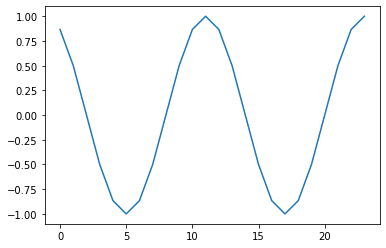

In [142]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math

def  calculate_season(date: datetime) -> float:
    """
    Takes a number between 0 and 11 and returns a number between -1 and 1
    If the number is a month number close to christmas the number will be close to 1,
    if the number is close to summer, the number will be close to -1.
    """
    month = date.month
    return math.cos(math.pi * (month % 12 ) / 6)
months = [ calculate_season(datetime(2000, x % 12 + 1, 1)) for x in range(0,24)]
print(months)
plt.plot(months)




In [ ]:
def is_summer_based_on_month(month):
    if month in [6, 7, 8]:
        return True
    else:
        return False

def is_winter_based_on_mont(month):
    if month in [1, 2, 3]:
        return True
    else:
        return False


  

In [152]:
import pipe
import numpy as np
print(data.index.date)

vector_calculate_day_of_the_week = np.vectorize(calculate_day_of_the_week)
vector_calculate_season = np.vectorize(calculate_season)
vector_calculate_month = np.vectorize(lambda date: date.month)
dates = data.index.date
data["day_of_the_week"] = vector_calculate_day_of_the_week(dates)
data["month"] = vector_calculate_month(dates)
data["season"] = vector_calculate_season(dates)
data.tail()


[datetime.date(2018, 12, 2) datetime.date(2018, 12, 3)
 datetime.date(2018, 12, 4) ... datetime.date(2021, 9, 6)
 datetime.date(2021, 9, 7) datetime.date(2021, 9, 8)]


,hits,day_of_the_week,season,month
date,,,,
2021-09-04,3,6,-1.836970e-16,9
2021-09-05,0,0,-1.836970e-16,9
2021-09-06,4,1,-1.836970e-16,9
2021-09-07,0,2,-1.836970e-16,9
2021-09-08,1,3,-1.836970e-16,9


In [ ]:
# id11573 has mose data with 902 entries
# data_chosen_cat = raw_data.loc[raw_data["cat_id"] == 11573][["hits","clicks", "date"]]
data_chosen_cat_small= raw_data_small.loc[raw_data_small["cat_id"] == 11573][["hits", "date"]]
data_chosen_cat_filled_dates_small = data_chosen_cat_small.groupby(pd.Grouper(key="date", freq="D")).sum()

print(data_chosen_cat_filled_dates_small.head())
dates = data_chosen_cat_filled_dates_small.index.tolist()
print(dates[:2])
data_chosen_cat_filled_dates_small.tail()
